In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Load Dataset

In [22]:
df = pd.read_csv("Customers.csv")
display(df.head())

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


(a) Compute and display summary statistics for each feature

In [23]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [24]:
def summary_statistics(df):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    stats = numeric_df.describe().T
    stats['range'] = stats['max'] - stats['min']
    stats['variance'] = numeric_df.var()
    percentiles = numeric_df.quantile([0.25, 0.5, 0.75]).T
    stats = stats.join(percentiles)
    display(stats)

summary_statistics(df)

,count,mean,std,min,25%,50%,75%,max,range,variance,0.25,0.5,0.75
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0,1999.0,3.335000e+05,500.75,1000.5,1500.25
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0,99.0,8.082505e+02,25.00,48.0,73.00
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0,189974.0,2.092105e+09,74572.00,110045.0,149092.75
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0,100.0,7.803453e+02,28.00,50.0,75.00
Work Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0,17.0,1.538369e+01,1.00,3.0,7.00
Family Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0,8.0,3.883850e+00,2.00,4.0,5.00


(b) Illustrate the feature distributions using histograms

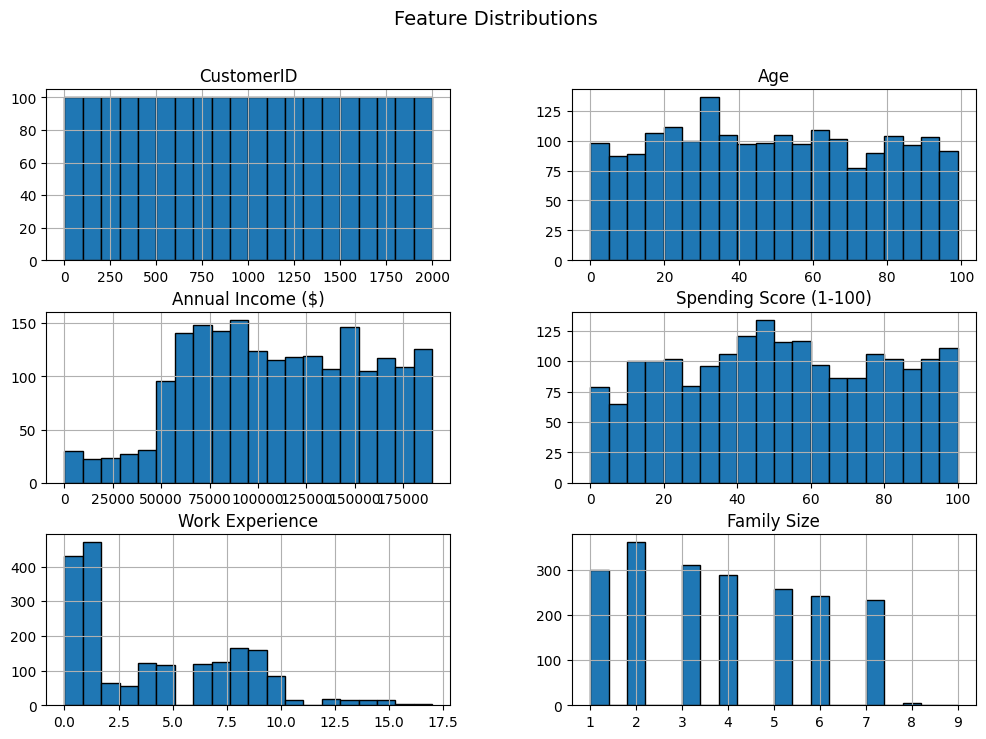

In [25]:
df.select_dtypes(include=[np.number]).hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

(c) Data Cleaning, Data Integration, Data Transformation, Data Model Building

In [26]:
# Data Cleaning: Handling Missing Values
df.fillna(df.mode().iloc[0], inplace=True) 


Encoding Categorical Variables


In [27]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Ensure all values are string before encoding
    label_encoders[column] = le

In [28]:
# Data Transformation: Creating Target Variable (Classification)
df['HighSpender'] = (df['Spending Score (1-100)'] > df['Spending Score (1-100)'].median()).astype(int)

In [29]:
# Defining Features and Target
X = df.drop(columns=['CustomerID', 'Spending Score (1-100)', 'HighSpender'])
y = df['HighSpender']


In [30]:
# Splitting Data
test_size = 0.2  # 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Model Building: Training a Classification Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Model Accuracy: 0.4925

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       200
           1       0.49      0.48      0.49       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400

